In [1]:
#Swapnil Saha Shawon 2022533042

In [2]:
#Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

In [3]:
# Load the data sets
X = np.load("/content/handsignX.npy")
y = np.load("/content/handsigny.npy")
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

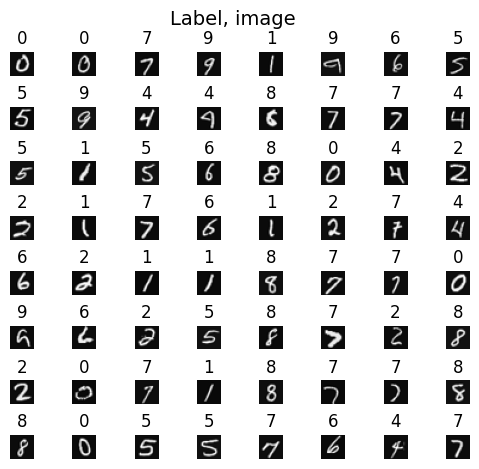

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [5]:
tf.random.set_seed(1234) # for consistent results


# Creating a Sequential model
model = Sequential([
    tf.keras.Input(shape=(400,)),  # Input layer with shape (400,)
    Dense(units=25, activation='relu'),  # Hidden layer with 25 units and ReLU activation
    Dense(units=15, activation='relu'),  # Hidden layer with 15 units and ReLU activation
    Dense(units=10, activation='linear')  # Output layer with 10 units and linear activation
], name='sequential_model')  # Naming the model as 'sequential_model'

model.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
#compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# model history with 40 epochs
history = model.fit(
    X, y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 3s 4ms/step - loss: 1.7566 - accuracy: 0.4722
Epoch 2/40
157/157 [==============================] - 1s 4ms/step - loss: 0.6946 - accuracy: 0.8256
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.8880
Epoch 4/40
157/157 [==============================] - 1s 5ms/step - loss: 0.3360 - accuracy: 0.9078
Epoch 5/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2909 - accuracy: 0.9178
Epoch 6/40
157/157 [==============================] - 1s 3ms/step - loss: 0.2610 - accuracy: 0.9276
Epoch 7/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9358
Epoch 8/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9390
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9420
Epoch 10/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9486

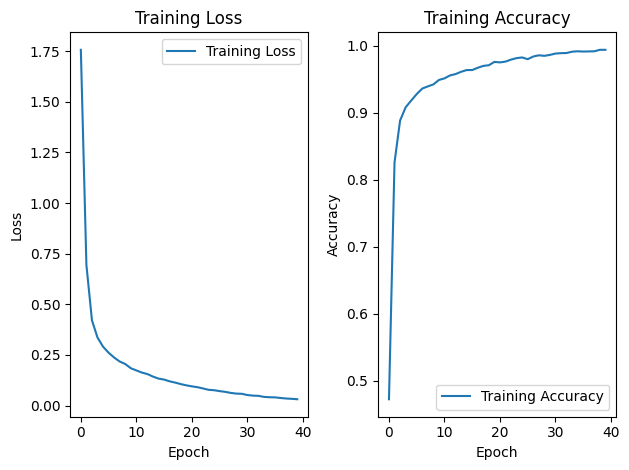

In [7]:
# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 19ms/step


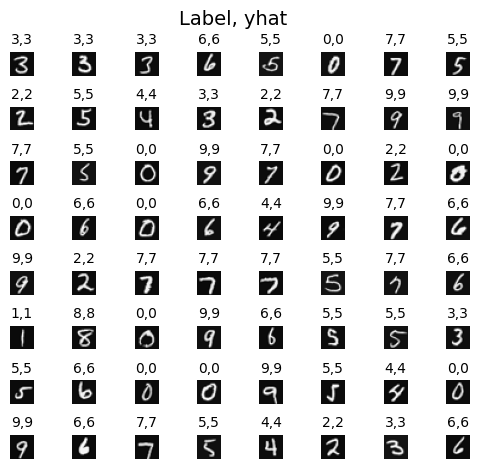

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()


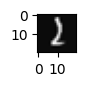

1/1 [==============================] - 0s 33ms/step

predicting a Two: 
[[-10.578205     0.46666947   5.0027537    2.6070082  -15.5907
   -6.4248967   -8.510106    -0.5527918   -4.2867985   -9.579195  ]]

Largest Prediction index: 2

predicting a Two. Probability vector: 
[[1.5473985e-07 9.6901497e-03 9.0432978e-01 8.2388729e-02 1.0296823e-09
  9.8483006e-06 1.2239582e-06 3.4961023e-03 8.3545943e-05 4.2021031e-07]]

Total of predictions: 1.000

np.argmax(prediction_p): 2


In [9]:
#Inferring one instance
image_of_two = X[1015]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
X_reshaped = image_of_two.reshape((20,20)).T

# Display the image
ax.imshow(X_reshaped, cmap='gray')
plt.show()

prediction = model.predict(image_of_two.reshape(1,400))  # prediction
print(f"\npredicting a Two: \n{prediction}")
print(f"\nLargest Prediction index: {np.argmax(prediction)}")

prediction_p = tf.nn.softmax(prediction)
print(f"\npredicting a Two. Probability vector: \n{prediction_p}")
print(f"\nTotal of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)
print(f"\nnp.argmax(prediction_p): {yhat}")

In [10]:
#checking X and y elements
#print(X[:10])
print(y)
y.shape

[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


(5000, 1)

In [11]:
# #converting images to .npy format
# import os
# import numpy as np
# import cv2

# def invert_colors(image):
#     return 255 - image

# def normalize_resize_images(input_dir, output_file, target_size=(20, 20)):
#     # List all files in the input directory
#     image_files = sorted([f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))], key=lambda x: int(x.split('.')[0]))

#     images = []
#     for image_file in image_files:
#         # Read image
#         img_path = os.path.join(input_dir, image_file)
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#         # Invert colors
#         img_inverted = invert_colors(img)

#         # Resize image
#         img_resized = cv2.resize(img_inverted, target_size, interpolation=cv2.INTER_AREA)

#         # Normalize image
#         img_normalized = img_resized / 255.0

#         # Flatten the image into a 1D array
#         img_flattened = img_normalized.flatten()

#         # Append to list of images
#         images.append(img_flattened)

#     # Stack flattened images along the first axis
#     images_array = np.stack(images)

#     # Save NumPy array as .npy file
#     np.save(output_file, images_array)

#     print(f"All images in directory converted and saved to {output_file}")

# # Example usage:
# input_directory = '/content/images'
# output_file = '/content/new_dataset.npy'
# target_size = (20, 20)

# normalize_resize_images(input_directory, output_file, target_size)


In [12]:
#load the new dataset
N = np.load("/content/new_dataset.npy")

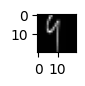

In [13]:
#Inferring one instance
image_of_two = N[55]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
N_reshaped = image_of_two.reshape((20,20)).T

# Display the image
ax.imshow(N_reshaped, cmap='gray')
plt.show()

In [14]:
#creating y array for the new dataset
import numpy as np

# Define the total number of rows and the number of unique values
total_rows = 200
num_unique_values = 10  # Number of unique values

# Create an array with the desired shape
yN = np.zeros((total_rows, 1), dtype = int)

# Assign values to each group of rows
for i in range(num_unique_values):
    start_index = i * 20
    end_index = (i + 1) * 20
    yN[start_index:end_index, :] = i  # Assign the value 'i' to the corresponding group of rows

# Print the array to verify the result
print(yN[25])


[1]


1/1 [==============================] - 0s 17ms/step


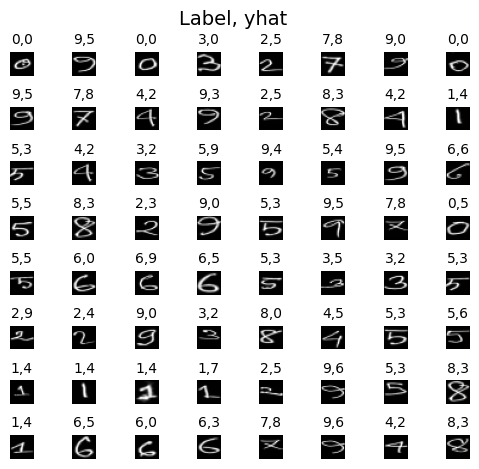

In [15]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = N.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    N_random_reshaped = N[random_index].reshape((20,20))

    # Display the image
    ax.imshow(N_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(N[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{yN[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

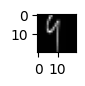

1/1 [==============================] - 0s 18ms/step

predicting a Four: 
[[-8.852434   -0.3056628  -4.054441   -1.3803867  -4.1831164   0.19661048
  -3.0239832  -3.539246   -6.6869907  -0.99015605]]

Largest Prediction index: 5

predicting a Four. Probability vector: 
[[5.3201184e-05 2.7399138e-01 6.4515383e-03 9.3538471e-02 5.6725745e-03
  4.5276353e-01 1.8079456e-02 1.0799647e-02 4.6383272e-04 1.3818640e-01]]

Total of predictions: 1.000

np.argmax(prediction_p): 5


In [16]:
#Inferring one instance
image_of_four = N[85]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
N_reshaped = image_of_two.reshape((20,20)).T

# Display the image
ax.imshow(N_reshaped, cmap='gray')
plt.show()

prediction = model.predict(image_of_two.reshape(1,400))  # prediction
print(f"\npredicting a Four: \n{prediction}")
print(f"\nLargest Prediction index: {np.argmax(prediction)}")

prediction_p = tf.nn.softmax(prediction)
print(f"\npredicting a Four. Probability vector: \n{prediction_p}")
print(f"\nTotal of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)
print(f"\nnp.argmax(prediction_p): {yhat}")

In [17]:
# Make predictions on the test set
predictions = model.predict(N)

# Convert the predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1)
actual_labels = tf.argmax(yN, axis=1)

# Compare predictions with ground truth
correct_predictions = tf.equal(predicted_labels, actual_labels)

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_predictions, dtype=tf.float32))

# Run the session to get the accuracy value
accuracy_value = accuracy.numpy()
print("Accuracy:", accuracy_value * 100, "%")


7/7 [==============================] - 0s 2ms/step
Accuracy: 12.999999523162842 %
